In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import glob
from upsetplot import from_contents, plot
from matplotlib import pyplot

from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns

# Set the font to Arial
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']

In [2]:
importance_files = glob.glob(
    "feature_importances/*.tsv"
)

In [3]:
importance_files

['feature_importances/resp_protein_importances.tsv',
 'feature_importances/coag_protein_importances.tsv',
 'feature_importances/cns_protein_importances.tsv',
 'feature_importances/renal_protein_importances.tsv',
 'feature_importances/cardiovasc_protein_importances.tsv',
 'feature_importances/liver_protein_importances.tsv',
 'feature_importances/sofa_protein_importances.tsv']

In [4]:

from pathlib import Path

all_importances = []

for importance_file in importance_files:

    path = Path(importance_file)

    panel_type = path.name.split("_")[0]

    importances = pd.read_csv(
        importance_file,
        sep="\t",
    )

    importances['type'] = panel_type

    all_importances.append(importances)


In [5]:
selected_features = pd.concat(
    [importances[['feature', 'type', 'mean_importance']] for importances in all_importances]
)
selected_features

,feature,type,mean_importance
0,PSPB_HUMAN,resp,0.835345
1,IBP2_HUMAN,resp,0.706482
2,COIA1_HUMAN,resp,0.673391
3,RS27A_HUMAN,resp,0.617936
4,TSP1_HUMAN,resp,0.602772
...,...,...,...
5,CO7_HUMAN,sofa,0.503446
6,ITB3_HUMAN,sofa,0.447870
7,CALR_HUMAN,sofa,0.418651
8,THBG_HUMAN,sofa,0.389414


In [6]:
import colorcet as cc

glasbey_cool = cc.glasbey_cool

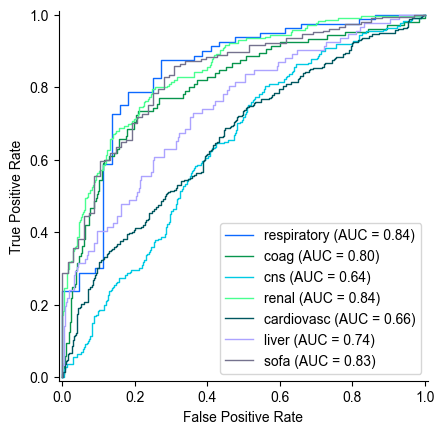

In [7]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay
from sklearn.metrics import auc

roc_files = glob.glob(
    "roc/*.tsv"
)

from pathlib import Path

fig, ax = plt.subplots()

for i, roc_file in enumerate(roc_files):

    path = Path(roc_file)

    panel_type = path.stem.split("_")[0]

    rocs = pd.read_csv(
        roc_file,
        sep="\t",
    )
    
    roc_curve = RocCurveDisplay(
        fpr=rocs['False Positive Rate'].values.ravel(),
        tpr=rocs['True Positive Rate'].values.ravel(),
        roc_auc=auc(rocs['False Positive Rate'], rocs['True Positive Rate']),
        
    )

    roc_curve.plot(
        c=glasbey_cool[i],
        name=panel_type,
        ax=ax,
        lw=1
    )
    

#fig.set_size_inches((3, 6))
sns.despine()


In [8]:
fig.savefig(
    "organ_dysfunction_rocs.pdf", dpi=300, bbox_inches="tight"
)

In [9]:
feature_types = selected_features['type'].unique()
feature_types

array(['resp', 'coag', 'cns', 'renal', 'cardiovasc', 'liver', 'sofa'],
      dtype=object)

In [10]:
selected_features['feature'] = selected_features['feature'].str.replace("_HUMAN", "")

In [11]:
selected_features['type'] = selected_features['type'].str.replace("resp", "Respiratory")
selected_features['type'] = selected_features['type'].str.replace("coag", "Coagulation")
selected_features['type'] = selected_features['type'].str.replace("cns", "CNS")
selected_features['type'] = selected_features['type'].str.replace("renal", "Renal")
selected_features['type'] = selected_features['type'].str.replace("liver", "Liver")
selected_features['type'] = selected_features['type'].str.replace("cardiovasc", "Cardiovascular")
selected_features['type'] = selected_features['type'].str.replace("sofa", "General")

In [12]:
feature_types = [
    'Cardiovascular', 
    'Renal', 
    'Coagulation', 
    'CNS', 
    'Liver', 
    'Respiratory', 
    'General'
]

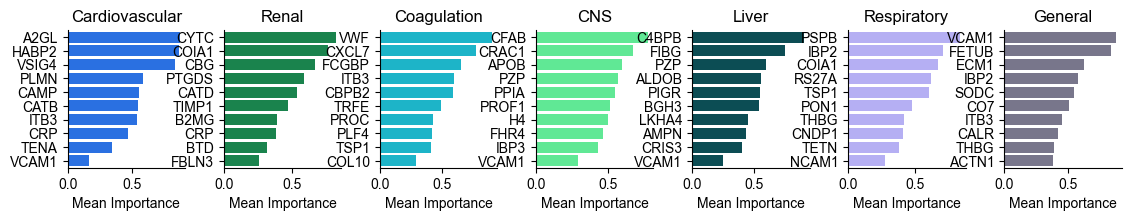

In [13]:
fig, axes = plt.subplots(
    nrows=1, 
    ncols=7, 
    figsize=(21, 3)
)

for i, type in enumerate(feature_types):

    type_data = selected_features[selected_features['type'] == type]

    g = sns.barplot(
        data=type_data,
        x="mean_importance",
        y="feature",
        ax=axes[i],
        color=glasbey_cool[i]
    )
    
    g.set_title(f"{type}")

    g.set_xlabel("Mean Importance")
    g.set_ylabel("")

plt.tight_layout()

sns.despine()



fig.set_size_inches((11, 2))

In [14]:
fig.savefig(
    "organ_feature_importances.pdf", dpi=300, bbox_inches="tight"
)

In [15]:
prediction_files = glob.glob(
    "predictions_test/*.tsv"
)

In [16]:
prediction_files

['predictions_test/respiratory.tsv',
 'predictions_test/coag.tsv',
 'predictions_test/cns.tsv',
 'predictions_test/renal.tsv',
 'predictions_test/cardiovasc.tsv',
 'predictions_test/liver.tsv',
 'predictions_test/sofa.tsv']

In [17]:

from pathlib import Path

all_predictions = []

for prediction_file in prediction_files:

    path = Path(prediction_file)

    panel_type = path.name.split("_")[0]

    predictions = pd.read_csv(
        prediction_file,
        sep="\t",
        index_col=0
    )

    all_predictions.append(predictions)


In [18]:
all_predictions = pd.concat(all_predictions, axis=1)

In [19]:
design_matrix_test = pd.read_csv(
    "../0_data/design_matrix_test.tsv",
    sep='\t'
)

In [20]:
design_matrix_test = design_matrix_test.set_index("injection").join(all_predictions).reset_index()

In [21]:
design_matrix_test.to_csv(
    "design_matrix_test_predictions.tsv",
    sep="\t",
    index=False
)

In [22]:
val_prediction_files = glob.glob(
    "predictions_val/*.tsv"
)

In [23]:
val_prediction_files

['predictions_val/respiratory.tsv',
 'predictions_val/coag.tsv',
 'predictions_val/cns.tsv',
 'predictions_val/renal.tsv',
 'predictions_val/cardiovasc.tsv',
 'predictions_val/liver.tsv',
 'predictions_val/sofa.tsv']

In [24]:

from pathlib import Path

val_all_predictions = []

for val_prediction_file in val_prediction_files:

    path = Path(val_prediction_file)

    panel_type = path.name.split("_")[0]

    val_predictions = pd.read_csv(
        val_prediction_file,
        sep="\t",
        index_col=0
    )

    val_all_predictions.append(val_predictions)


In [25]:
val_all_predictions = pd.concat(val_all_predictions, axis=1)

In [26]:
design_matrix_val = pd.read_csv(
    "../0_data/design_matrix_validation.tsv",
    sep='\t'
)

In [27]:
design_matrix_val = design_matrix_val.set_index("injection").join(val_all_predictions).reset_index()

In [28]:
design_matrix_val.to_csv(
    "design_matrix_val_predictions.tsv",
    sep="\t",
    index=False
)

In [29]:
probability_columns = [
    col for col in design_matrix_test.columns if "probability" in col and "sofa" not in col
]
probability_columns

['resp_probability',
 'coag_probability',
 'cns_probability',
 'renal_probability',
 'cardiovasc_probability',
 'liver_probability']

In [30]:
from umap import UMAP
reducer = UMAP(n_components=2, random_state=42)

components = reducer.fit_transform(design_matrix_test[probability_columns])
design_matrix_test['UMAP 1'] = components[:, 0]
design_matrix_test['UMAP 2'] = components[:, 1]

/srv/data1/home/aaron/envs/miniconda3/envs/revisionenv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/srv/data1/home/aaron/envs/miniconda3/envs/revisionenv/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [31]:
import matplotlib as mpl
import matplotlib.pyplot as plt

cmap = plt.get_cmap('coolwarm')



resp_probability


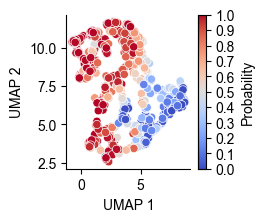

coag_probability


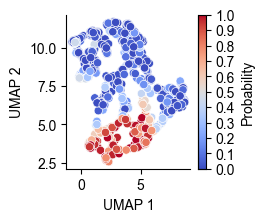

cns_probability


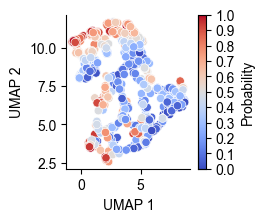

renal_probability


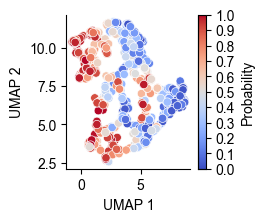

cardiovasc_probability


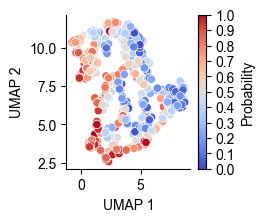

liver_probability


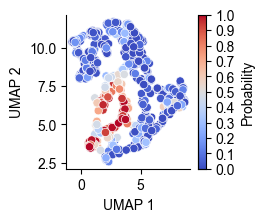

In [32]:


for prob_col in probability_columns:

    print(prob_col)

    fig, ax = plt.subplots()

    g = sns.scatterplot(
        data=design_matrix_test,
        x="UMAP 1",
        y="UMAP 2",
        hue=prob_col,
        palette=cmap,
        ax=ax,
        legend=False
    )

    cbar = fig.colorbar(
        mpl.cm.ScalarMappable(
            norm=mpl.colors.Normalize(vmin=0.0, vmax=1.0, clip=False), cmap=cmap),
            ticks=np.arange(0.0, 1.0 + 0.1, 0.1),
            label="Probability",
            ax=ax)

    fig.set_size_inches((2, 2))

    sns.despine()

    plt.show()

    fig.savefig(
        f"{prob_col}.pdf", dpi=300, bbox_inches="tight"
    )

